## Лабораторная работа №3

Задание:
1.	Найти на сайте РосСтат  https://rosstat.gov.ru/statistic  (или в других источниках) предположительно зависимые данные (например: «доля людей в возрасте 70+» и «приверженность жителей тех к ЗОЖ» по регионам), посчитать коэффициент корреляции, оценить меру связи.
Построить гистограммы рассеяния, линию аппроксимации  и посчитать величину достоверности аппроксимации R^2.
2.	Найти датасет с объемом ~100 наблюдений (и более), сделать выборку =~ 1/3 наблюдений 
    1. случайным образом, 
    2. сделать стратифицированную выборку (разбив выборку на группы по смысловому содержанию, например, для регионов стратами могут быть федеральные округа). 
3.	Посчитать 
    1. среднее значение по выборкам из п.2 (2.1)случайной и 2.2)стратифицированной), 
    2. доверительный интервал для среднего (на уровне доверия 90%, 95%, 99%).
Сравнить среднее генеральной выборки п.2  с полученными в выборках 2.1) и 2.2)  и с границами доверительных интервалов из п.3.2).


В качестве датасета возьмем информацию о расходах на рекламу в различных медиа (телевидение, радио, газеты) и их влиянии на продажи.

In [9]:
# импорт библиотек

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [11]:
df = pd.read_csv(r'df_lab_3.csv')

In [12]:
df

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


Коэффициент корреляции между TV и Sales: 0.7822244248616066
Коэффициент корреляции между Radio и Sales: 0.5762225745710553
Коэффициент корреляции между Newspaper и Sales: 0.22829902637616534


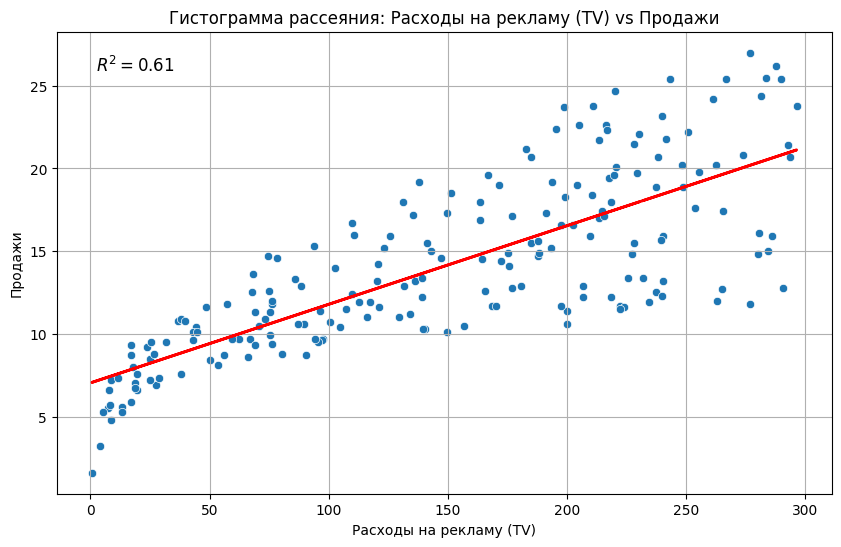

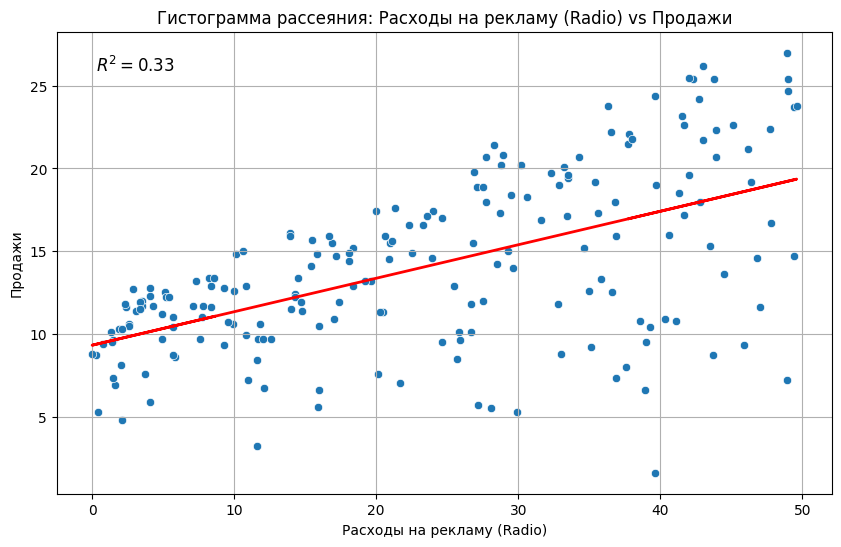

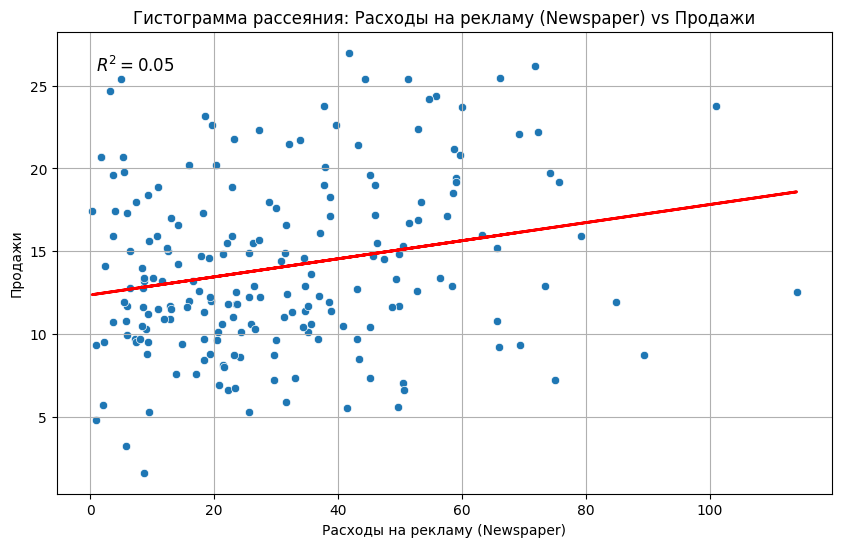

In [13]:
df.rename(columns={'Unnamed: 0': 'id'}, inplace=True)

# Вычисление коэффициента корреляции
correlation_tv = df['TV'].corr(df['Sales'])
correlation_radio = df['Radio'].corr(df['Sales'])
correlation_newspaper = df['Newspaper'].corr(df['Sales'])

print(f"Коэффициент корреляции между TV и Sales: {correlation_tv}")
print(f"Коэффициент корреляции между Radio и Sales: {correlation_radio}")
print(f"Коэффициент корреляции между Newspaper и Sales: {correlation_newspaper}")

# Функция для построения гистограммы рассеяния и линии аппроксимации
def plot_scatter_with_regression(x, y, x_label, y_label):
    plt.figure(figsize=(10, 6))
    
    # Построение гистограммы рассеяния
    sns.scatterplot(x=x, y=y)
    
    # Линейная регрессия
    model = LinearRegression()
    x_reshaped = x.values.reshape(-1, 1)
    model.fit(x_reshaped, y)
    y_pred = model.predict(x_reshaped)
    
    # Добавление линии аппроксимации
    plt.plot(x, y_pred, color='red', linewidth=2)
    
    # Вычисление R^2
    r_squared = model.score(x_reshaped, y)
    plt.title(f'Гистограмма рассеяния: {x_label} vs {y_label}')
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.grid()
    plt.text(0.05, 0.95, f'$R^2 = {r_squared:.2f}$', transform=plt.gca().transAxes, fontsize=12, verticalalignment='top')
    plt.show()

# Построение графиков для каждого признака
plot_scatter_with_regression(df['TV'], df['Sales'], 'Расходы на рекламу (TV)', 'Продажи')
plot_scatter_with_regression(df['Radio'], df['Sales'], 'Расходы на рекламу (Radio)', 'Продажи')
plot_scatter_with_regression(df['Newspaper'], df['Sales'], 'Расходы на рекламу (Newspaper)', 'Продажи')

По результатам видим, что статистически значимой является корреляция между расходами на ТВ и продажами (>70%)

Перейдем к заданиям 2 и 3:

In [18]:
# Случайная выборка ~1/3 наблюдений
random_sample = df.sample(frac=1/3, random_state=42)

# Создание страт по расходам на рекламу (TV)
df['TV_stratum'] = pd.qcut(df['TV'], q=3, labels=['Low', 'Medium', 'High'])

# Стратифицированная выборка
stratified_sample = df.groupby('TV_stratum', group_keys=False).apply(lambda x: x.sample(frac=1/3, random_state=42))

# Среднее значение по генеральной выборке
mean_population = df['Sales'].mean()

# Среднее значение по случайной выборке
mean_random = random_sample['Sales'].mean()

# Среднее значение по стратифицированной выборке
mean_stratified = stratified_sample['Sales'].mean()

print(f"Среднее значение по генеральной выборке: {mean_population}")
print(f"Среднее значение по случайной выборке: {mean_random}")
print(f"Среднее значение по стратифицированной выборке: {mean_stratified}")


Среднее значение по генеральной выборке: 14.0225
Среднее значение по случайной выборке: 12.934328358208955
Среднее значение по стратифицированной выборке: 13.580303030303032


C:\Users\Malyuzhenec.V\AppData\Local\Temp\ipykernel_12260\2956806254.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  stratified_sample = df.groupby('TV_stratum', group_keys=False).apply(lambda x: x.sample(frac=1/3, random_state=42))
C:\Users\Malyuzhenec.V\AppData\Local\Temp\ipykernel_12260\2956806254.py:8: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  stratified_sample = df.groupby('TV_stratum', group_keys=False).apply(lambda x: x.sample(frac=1/3, random_state=42))


In [15]:
import scipy.stats as stats

def confidence_interval(data, confidence=0.95):
    mean = np.mean(data)
    std_err = stats.sem(data)
    h = std_err * stats.t.ppf((1 + confidence) / 2., len(data) - 1)
    return mean - h, mean + h

# Доверительные интервалы
ci_random_90 = confidence_interval(random_sample['Sales'], confidence=0.90)
ci_random_95 = confidence_interval(random_sample['Sales'], confidence=0.95)
ci_random_99 = confidence_interval(random_sample['Sales'], confidence=0.99)

ci_stratified_90 = confidence_interval(stratified_sample['Sales'], confidence=0.90)
ci_stratified_95 = confidence_interval(stratified_sample['Sales'], confidence=0.95)
ci_stratified_99 = confidence_interval(stratified_sample['Sales'], confidence=0.99)

print(f"Доверительный интервал для случайной выборки (90%): {ci_random_90}")
print(f"Доверительный интервал для случайной выборки (95%): {ci_random_95}")
print(f"Доверительный интервал для случайной выборки (99%): {ci_random_99}")

print(f"Доверительный интервал для стратифицированной выборки (90%): {ci_stratified_90}")
print(f"Доверительный интервал для стратифицированной выборки (95%): {ci_stratified_95}")
print(f"Доверительный интервал для стратифицированной выборки (99%): {ci_stratified_99}")


Доверительный интервал для случайной выборки (90%): (np.float64(11.880471560015515), np.float64(13.988185156402395))
Доверительный интервал для случайной выборки (95%): (np.float64(11.67308627067007), np.float64(14.195570445747839))
Доверительный интервал для случайной выборки (99%): (np.float64(11.258794975907996), np.float64(14.609861740509913))
Доверительный интервал для стратифицированной выборки (90%): (np.float64(12.57775958878357), np.float64(14.582846471822494))
Доверительный интервал для стратифицированной выборки (95%): (np.float64(12.38039032264892), np.float64(14.780215737957144))
Доверительный интервал для стратифицированной выборки (99%): (np.float64(11.985974611358746), np.float64(15.174631449247318))


In [16]:
print(f"Сравнение:")
print(f"Генеральная выборка: {mean_population}")
print(f"Случайная выборка: {mean_random} (Доверительный интервал: {ci_random_95})")
print(f"Стратифицированная выборка: {mean_stratified} (Доверительный интервал: {ci_stratified_95})")

Сравнение:
Генеральная выборка: 14.0225
Случайная выборка: 12.934328358208955 (Доверительный интервал: (np.float64(11.67308627067007), np.float64(14.195570445747839)))
Стратифицированная выборка: 13.580303030303032 (Доверительный интервал: (np.float64(12.38039032264892), np.float64(14.780215737957144)))


### Вывод
В данном исследовании был проведен анализ влияния бюджетов на рекламу в различных источниках на объем продаж. Используя данные из датасета, были рассчитаны коэффициенты корреляции между расходами на телевидение, радио и газеты с объемом продаж. Также были созданы случайная и стратифицированная выборки, а также рассчитаны доверительные интервалы для средних значений.

Анализ
1. Коэффициенты корреляции: Наибольшая связь наблюдается между расходами на телевидение и объемом продаж (0.78), что указывает на то, что увеличение бюджета на телевидение, скорее всего, приводит к росту продаж. Связь с радио (0.58) и газетами (0.23) менее выражена.
2. Сравнение средних значений: Среднее значение по генеральной выборке (14.02) выше, чем в случайной выборке (12.93) и стратифицированной выборке (13.58). Это может указывать на то, что случайная выборка менее репрезентативна по сравнению с генеральной выборкой.
3. Доверительные интервалы: Доверительные интервалы для случайной и стратифицированной выборок показывают, что средние значения этих выборок находятся в пределах, которые не перекрывают генеральное среднее. Это может свидетельствовать о том, что выборки могут не полностью отражать генеральную совокупность.